# IBM Professional Certificate - SQL for Data Science - module 4.
## These are my personal notes from SQL for data science

The material appearing here is not myown. I wrote these Jupyter notebooks to organize and summarize the content of this course.

Víctor J. Maciá
 
 ## Really Important! (This is about the SQL syntaxis)
 
 If you need to check something, here you can find the correct syntaxis. https://www.w3schools.com/sql/sql_ref_keywords.asp
 
 In particular notice the following:
 
 Every line has to be separated by a comma when you write inside a function. For instance
 
 
CREATE table INSTRUCTOR  (

			ins_id INTEGER PRIMARY KEY NOT NULL,
            
			lastname VARCHAR(15),
            
			firstname VARCHAR(15),
            
			city VARCHAR(15),
            
			country CHAR(2)
		);
 
 When using the "DROP" you have to write DROP tablename; Each statement should conclude with a semicolon. For instance
 
 DROP table INSTRUCTOR;
 

Summary: invoke built-in database functions, work with nested queries, and run involving multiple tables.


## Built in database functions

Most databases come with built-in SQL functions. Built-in functions can be inclused as part of SQL statements.
This can speed data processing. Using database function can signifcantly reduce the amount of data that needs to be retrieved, that is reduces network traffic anb bandwidth

We can create our own functions. User-defined functions in our database (advanced topic)

![title](./picture30.png)



## Aggregate or Column functions

Take a co0lection of like values,

INPUT: Collection of values (e.g) 
OUTPUT: Single value

__Examples:__ sum(),min(),max(),avg(),etc

## SUM function

The SUM function is use to add up all the values in a column.

Syntaxis: SUM(Column_name)

__Example:__ select SUM(COST) from PETRECUE

__Example 2:__ Explicitly name the output column SUM_OF_COST:

select SUM(COST)  as SUM_OF_COST
    from PETRESCUE
    

## MIN,MAX

MIN -> minimum value
MAX -> maximum value

__Example 3:__ Get the maximum quantity of any animal

select MAX(QUANTITY) from PETRESCUE


__Example 3B:__ Get the minimum value of ID column for Dogs

select MIN(ID) from PETRESCUE where ANIMAL = 'Dog'

## Average function

The average function AVG() is used to return the average or the mean value.

__Example 4:__ Specify the Average value of COST

select AVG(COST) from PETRESCUE

We can perform mathematical operations between columns and then apply aggregate functions on them.

__Example 5:__ Calculate the average cost per 'Dog'

select AVG(COST / QUANTITY) from PETRESCUE where ANIMAL equals 'Dog'

## SCALAR and STRING FUNCTIONS

SCALAR: Perform operations on every input value.
Examples: ROUND(), LENGTH(), UCASE, LCASE.

__Example 6:__ Round up or DOWN every value in COST

select 

    ROUND(COST)
    
    from PETRESCUE
    

There is a class of scalar functions called __STRING FUNCTIONS__. These functions can be used for operations on strings.
That is char and varchar values.

__Example 7:__ retrieve the length of each value in ANIMAL.

select 
    LENGTH(ANIMAL)
    from PETRESCUE
    
## Uppercase and Lowercase functions

Uppercase and Lowercase functions can be used to return uppercase or lowercase values of strings.

__Example 8:__ Retrieve ANIMAL values in UPPERCASE

select UCASE(ANIMAL) from PETRESCUE

## Using the WHERE clause with scalar functions

__Example 9:__ Use the function in a WHERE clause

select * from PETRESCUE

where LCASE(ANIMAL) = 'cat'

We can use this type of statement when we are not sure whether the values are stored in upper or lower or mixed case in the table.

We can also one function operate on the output of another function. 

__Example 10:__ Use the DISTINCT() function to get unique value

select DISTINCT(UCASE(ANIMAL)) from PETRESCUE.

Here we get unique cases for ANIMAL column in uppercase.





## Date and Time Built-in Functions

Most databases contain special datatypes for dates and times.

DB2 -> DATE YYYYMMDD 
       TIME HHMMSS
       TIMESTAMP YYYYXXDDHHMMSSZZZZZZ
       
TIMESTAMP -> 20 digits year, month (3X), day, hour, minute, seconds, microseconds (6Z)

DATE/TIME functions: YEAR(), MONTH(), DAY(), DAYOFMONTH(), DAYOFWEEK(), DAYOFYEAR(), WEEK(), HOUR(), MINUTE(), SECOND().

### DAY function

The day function can be used to extract the day portion from a date.

__Example 11:__ Extract the DAY portion from a data

select DAY(RESCUEDATE) from PETRESCUE

where ANIMAL = 'Cat'

### DATE and TIME in a WHERE clause

__Example 12:__ Get the number of rescues during the month of May

select COUNT(*) from PETRESCUE

where MONTH(RESCUEDATE) = '05'


### DATE or TIME arithmetic

__Example 13:__ What date is it 3 days after each rescue date? (Maybe you want to know this because the rescue needs to be processed within three days)

select (RECUEDATE + 3 DAYS) from PETRESCUE

### SPECIAL REGISTERS: CURRENT_DATE and CURRENT_TIME

__Example 14:__ Find how many days have passed since each RESCUEDATE till now.

select (CURRENT_DATE - RESCUEDATE) from PETRESCUE

The result has the format: YMMDD (Years - months - days)



## Sub-queries to evaluate aggregate functions.

A sub-query is a query inside another query (within a parenthesis and nested inside another query)

__Example of a nested query:__

select COLUMN1 from TABLE
    where COLUMN2 = (select MAX(COLUMN2) from TABLE)
    

We were using a table from HUMAN RESOURCES that we called EMPLOYEES in NOTEBOOK1.

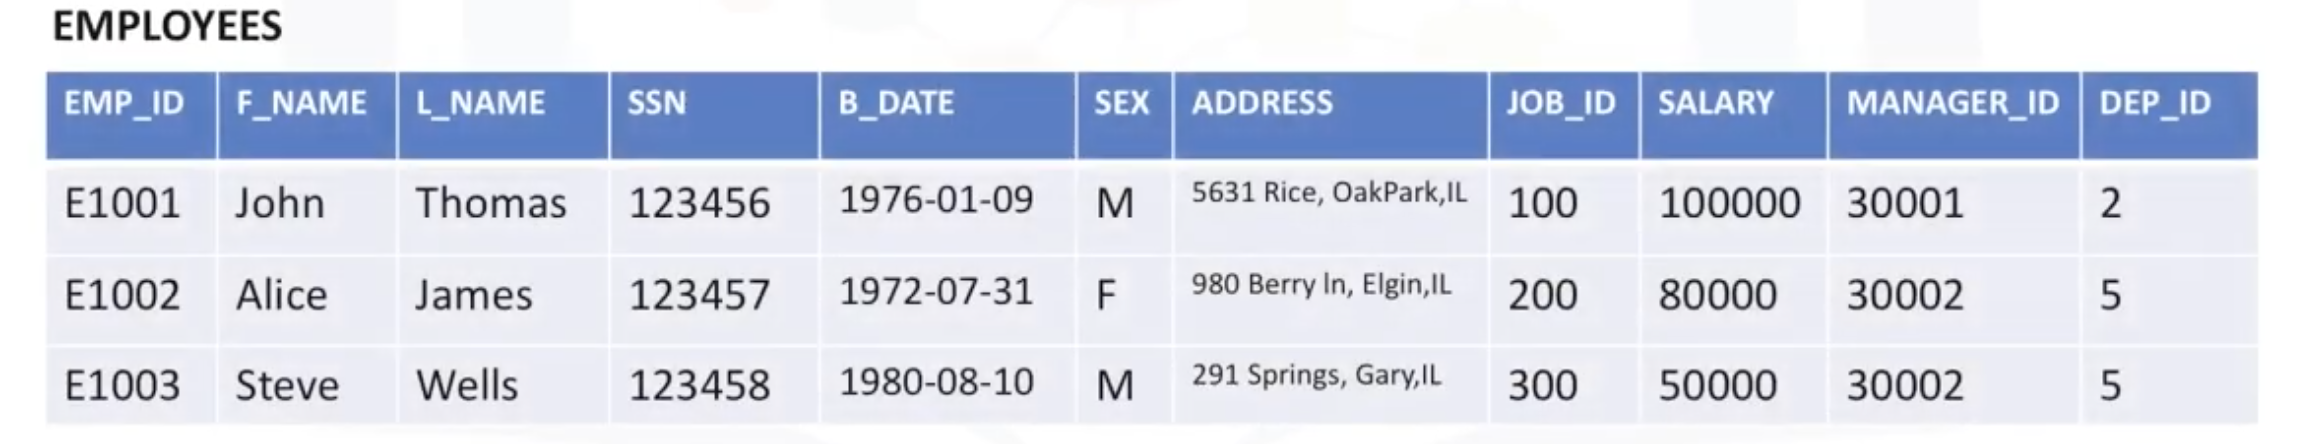
 
 This table contains several columns, including an employee ID, first name, last name, salary, etc.
 We will work over this table during the following examples.
 
 __Example:__ To retrieve the list of employees who earn more than the average salary.
 
 We could use the code
 
 select * from employees
     where salary > AVG(salary);
     
 __this would result in error.__ (invalid use of the aggregate function)
 One of the limitations of built in aggregate functions, like the average function, is that they cannot always be evaluated in the WHERE clause. To evaluate a function like average in the WHERE clause, we can make use of a __sub-select expresion__ like the one shown here.
 
 select EMP_ID,F_NAME, L_NAME, SALARY
     
     from employees
     
     where SALARY < 
     
     (select AVG(SALARY) from employees);
 

 The sub-select clause doesn't just have to go in the WHERE clause. It can also go in other parts of the query such as in the list of columns to be selected. Such sub-queries are called __column expressions__.
 
 Let's see one scenario where we might need to use a __column expression__:
 
 We want to compare the salary of each employee with the average salary.
 
 select EMP_ID, SALARY, AVG(SALARY) AS AVG_SALARY
     from employees;
     
 __This pieces of code will fail to succeed.__ The error in this case will be "no group by clause is specified".
 We can circumvent this error by using the average function in a sub-query placed in the list of the columns.
 
 select EMP_ID, SALARY, 
 
 (select AVG(SALARY) from employees) 
 
     as AVG_SALARY 
 
 from employees;
 

__Another option is to make the sub-query be part of the FROM clause.__ Sub-queries like these are sometimes called derived tables or table expressions. Because the outer query uses the results of the sub-query as a data source.

Let's look at an example to create a table expression that contains nonsensitive employee information.

select * from
    
    ( select EMP_ID, F_NAME, L_NAME, DEP_ID 
    
                from employees ) AS EMP4ALL;
                
                
                
                

 

## Querying multiple tables.

There are several way to access multiple tables in the same query.

1. Sub-queries
2. Implicit JOIN
3. JOIN operators (INNER JOIN, OUTER JOIN, etc)

We cover here the first two options.

Recall the table "Employees".

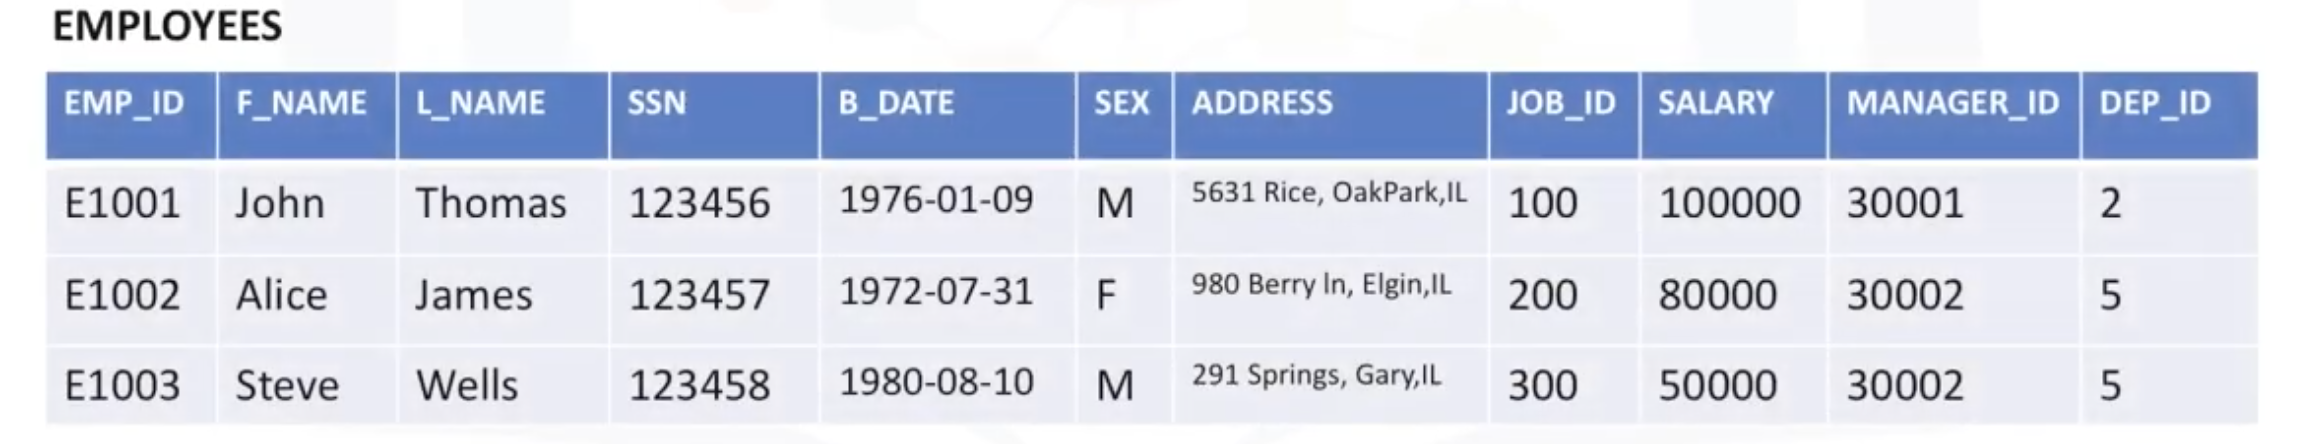

Now we have the department table.

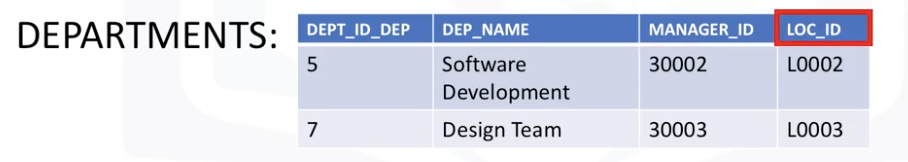

We will use these tables for the examples. Let's use sub-queries to work with multiple tables.

__Example:__ we want to retrieve only the employee records from the employees table for which a department ID exists in the department table, we can use a sub-query as follows.

select * from employees 
    
    where DEP_ID IN
    
    ( select DEPT_ID_DEP from departments );
    
Here the outer query accesses the employees table and the sub-query on the departments table is used for filtering the result set of the outer query. 

__Example:__ suppose we want to retrieve only the list of employees from a specific location. We do not have any location information in the employees table, but the departments table has a column called location ID. We can use a sub-query from the Departments table as input to the employee table query as follows.

select * from employees,

    where DEPT_ID IN
    
    ( select DEPT_ID_DEP from departments
    
            where location ID equals 'L0002');
            
__Example:__ let's retrieve the department ID and department name for employees who earn more than $70,000.

To do so, we will need a sub-query on the employees table to satisfy the salary criteria, and then feed it as input to an outer query on the departments table in order to get the matching department info.

select DEPT_ID_DEP, DEP_NAME from employees
    
    where DEPT_ID_DEP IN
    
     ( select DEP_ID from employees
     
         where SALARY > 70000 );


## Accessing multiple tables with Implicit Join.

__Example:__ Specify 2 tables in the FROM clause.

select * from employees, department;

This result in a table join, but now we are not explicitly using the join operator. The resulting join in this example is called a full join or Cartesian join, because every row in the first table is joined with every row in the second table. 

If you examine the results set, you will see more rows than in both tables individually. We can use additional operands to limit the result set.

__Example:__ In this example we limit the result set to only rows with matching department IDS.

select * from employees, departments

    where employes.DEP_ID = 
        
            departments.DEPT_ID_DEP;
            
Notice that in the WHERE clause, we prefix the name of the column with the name of the table. 
This is to fully qualify the column name, since it's possible that different tables could have some column names that are exactly the same.

__Example:__ Since the tables names can sometimes be long, we can use shorter aliases for table names.

select EMP_ID, DEP_NAME from employees E, departments D 

        where E.DEP_ID = D.DEPT_ID_DEP;

    
Here, we define the __alias__ E for employees table and D for departments table and the use these aliases in the WHERE clause.

__Example:__ Department name for each employee.

select EMP_ID, DEP_NAME

    from employees E, department D
        
        where E.DEP_ID = D.DEPT_ID_DEP;
        
 Similar to before, the column names in the select clause can also be prefixed by aliases as shown in the query.
 
 select E.EMP_ID, D.DEP_ID_DEP from 
         
         employees E, departments D
         
         where E.DEP_ID = D.DEPT_ID_DEP
         
         